## Import Library & Packages

In [1]:
#!pip install --upgrade notebook nbconvert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data Import

dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
import pandas as pd

path = '/Users/qianlou/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Raw Data/marketing_campaign.csv'
data = pd.read_csv(path, sep='\t')

## Understanding Data

In [3]:
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info() # check for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe() # numerical data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts()) # categorical data

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


## Missing Values

In [7]:
missing_values = data.isnull().sum() # Only column income that has 24 missing values
missing_p = round(24/data.shape[0] * 100, 4) # Hard code in 24
print("Missing Values:", missing_values)
print("Missing Value %:", missing_p, "%") # 1.07% of rows have missing values

Missing Values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Missing Value %: 1.0714 %


In [8]:
missing_income_rows = data[data['Income'].isnull()] # Checking the missing row details
missing_income_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [9]:
# Do not want to delete the missing rows, use median income might not be accurate, so using iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

# separate numerical and categorical values
columns_for_imputation = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income']
data_for_imputation = data[columns_for_imputation].copy()

data_categorical = data[['Education', 'Marital_Status']]

encoder = OneHotEncoder(drop='first')
data_encoded = encoder.fit_transform(data_categorical) 

data_encoded = pd.DataFrame(data_encoded.toarray(), 
                            columns=encoder.get_feature_names_out(['Education', 'Marital_Status']))

# combining back the numerical and categorical values
data_for_imputation = data_for_imputation.reset_index(drop=True)
data_encoded = data_encoded.reset_index(drop=True)

data_combined = pd.concat([data_for_imputation, data_encoded], axis=1)

# impute the missing values
imputer = IterativeImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# use a copy for the new data
data2 = data.copy()
data2.reset_index(drop=True, inplace=True)
imputed_data.reset_index(drop=True, inplace=True)
data2.loc[data2['Income'].isnull(), 'Income'] = imputed_data.loc[data2['Income'].isnull(), 'Income']

In [10]:
# Checking whether got rid of missing values
print("Number of missing values for each column:")
print(data2.isnull().sum())

# Checking whether deleted more values than needed
different_rows_data = len(data) - len(pd.merge(data, data2, how='inner'))
different_rows_data2 = len(data2) - len(pd.merge(data, data2, how='inner'))

print("Number of different rows in data compared to data2:", different_rows_data)
print("Number of different rows in data2 compared to data:", different_rows_data2)

Number of missing values for each column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Number of different rows in data compared to data2: 24
Number of different rows in data2 compared to data: 24


In [11]:
# double checking whether other data is not imputed
check_value = data2[data2['ID'].isin([5524, 2174, 4141, 1994, 5255, 7281])] # first 3 IDs from the non-missing value row & rest from missing value row
check_value # value matches, go to next phase

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,41345.223983,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,40701.142374,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,65048.006205,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0


## Duplication check

In [12]:
data2[data2.duplicated()] # no duplicated values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [13]:
data2.describe() # numerical data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52207.086581,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25073.375896,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35434.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Outliers check

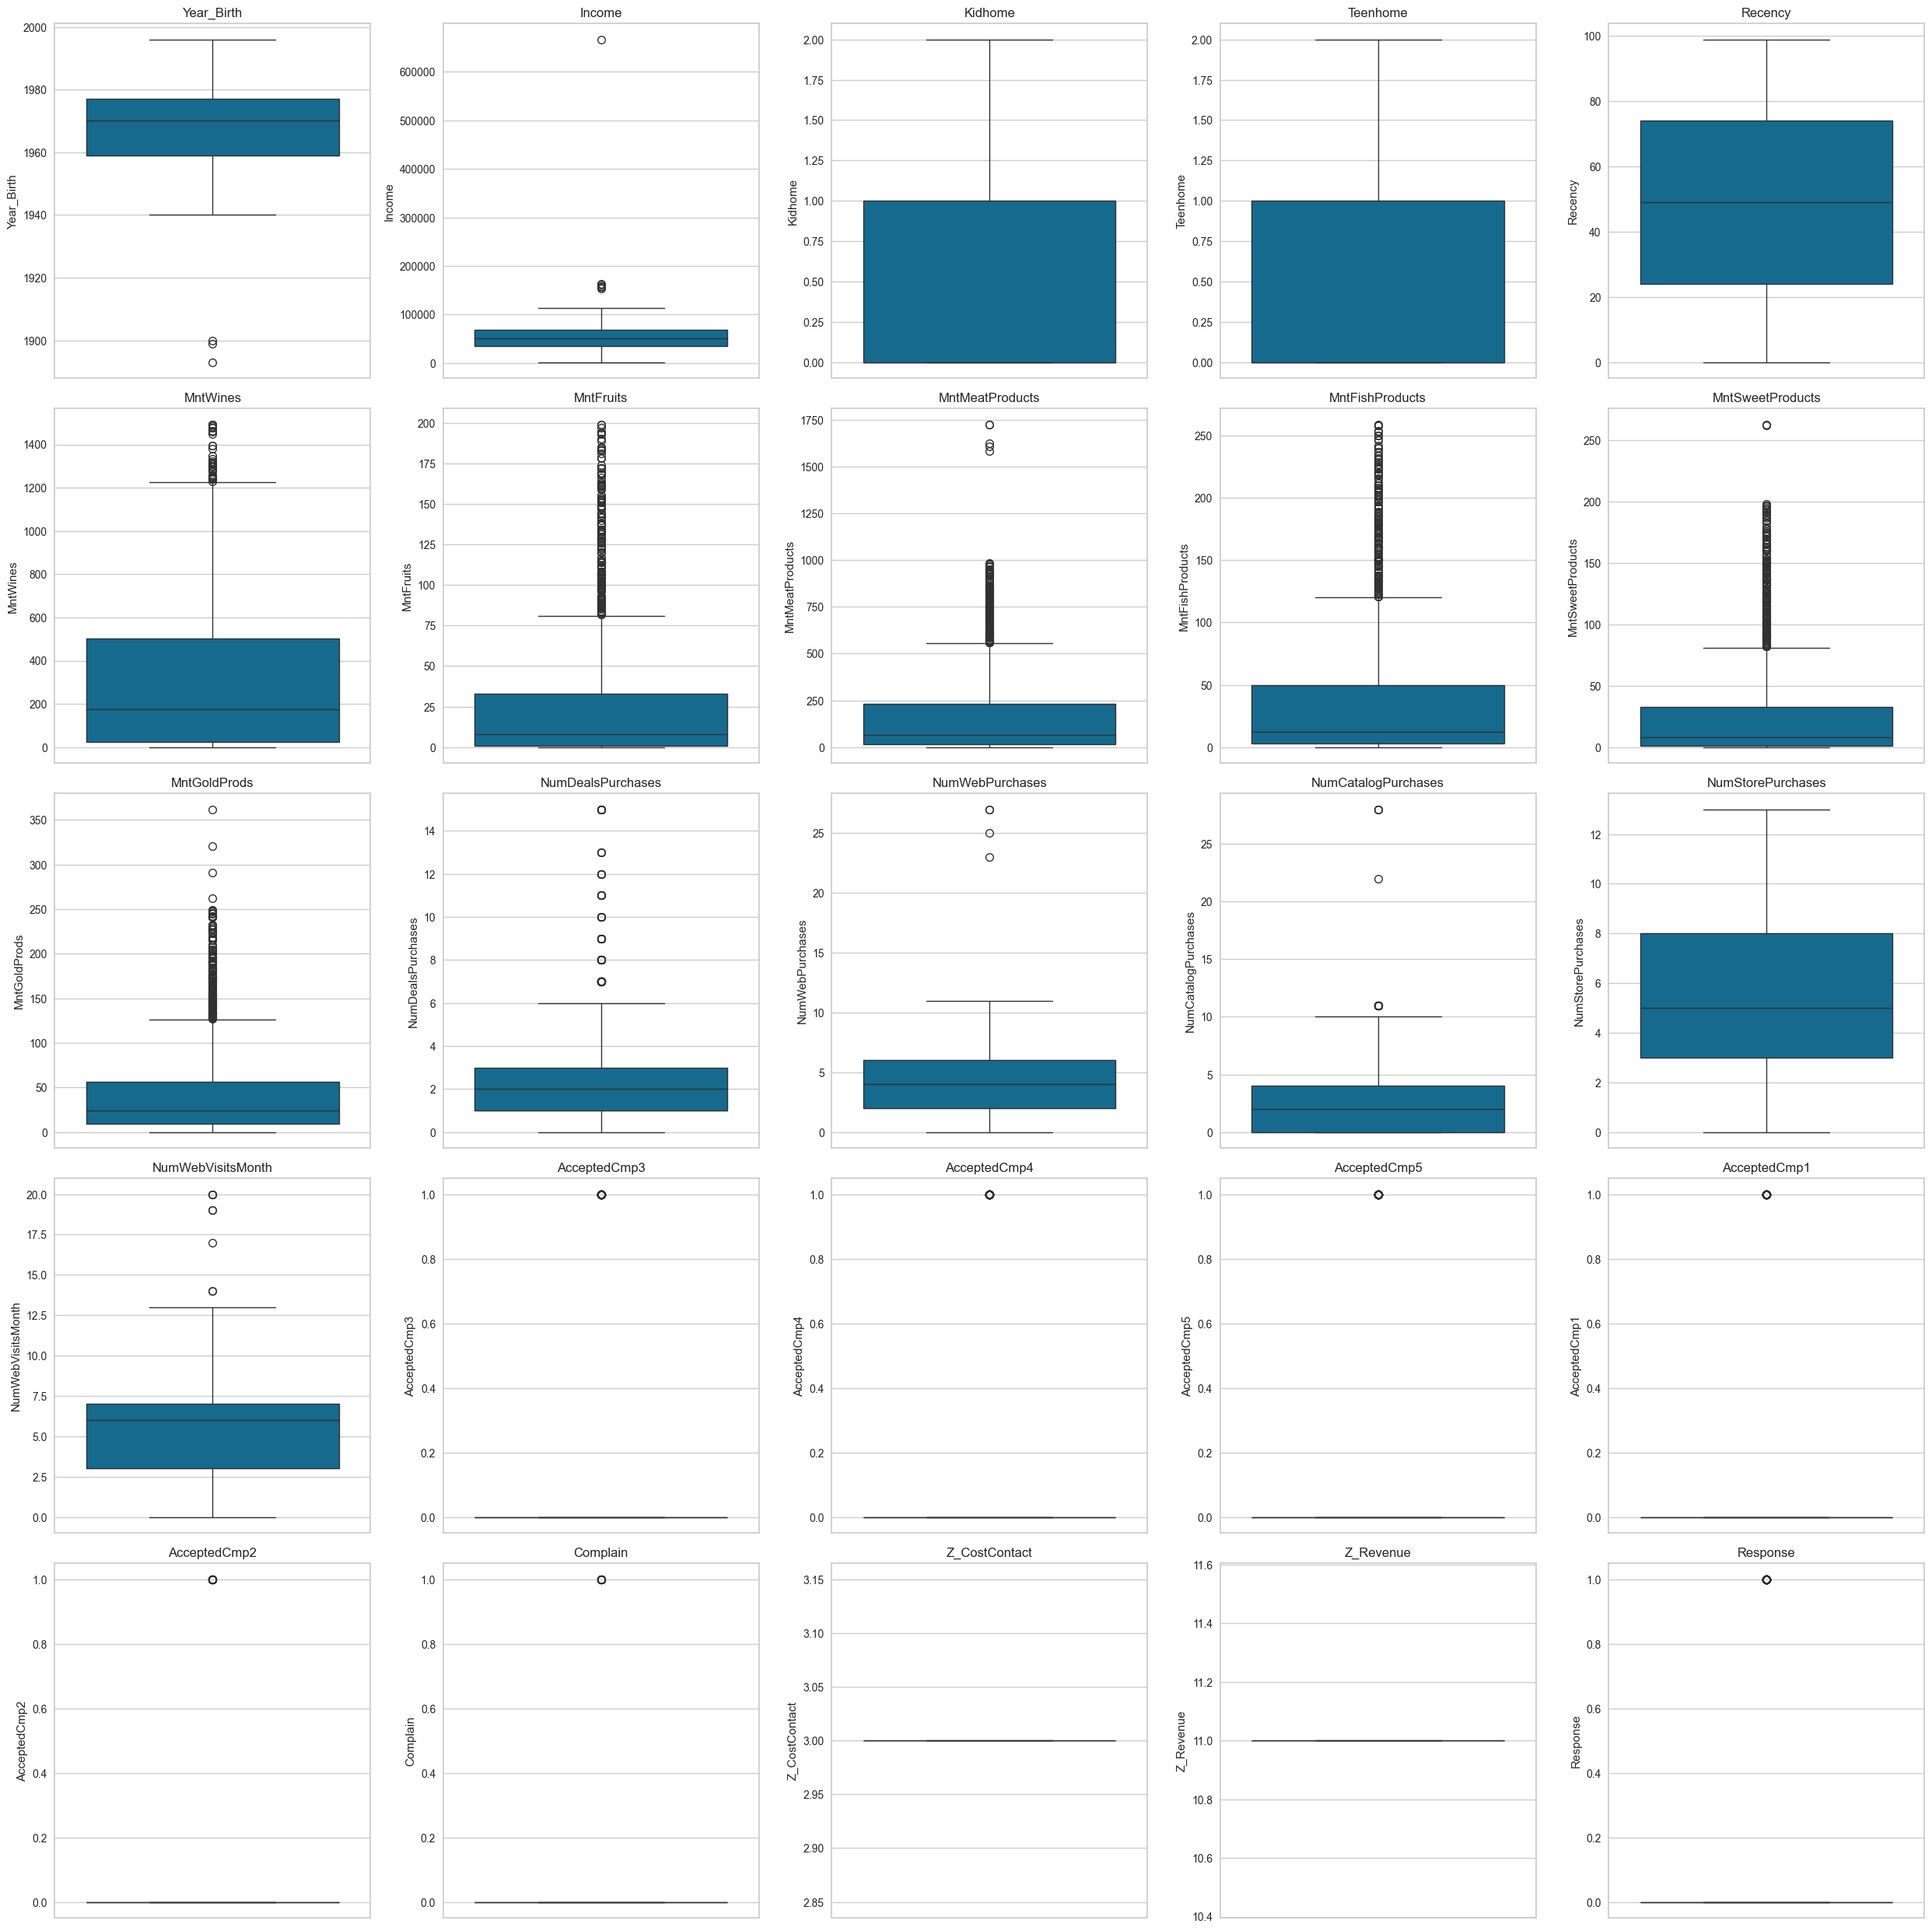

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = data2.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 4) // 5

plt.figure(figsize=(25, 5 * num_rows))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(data=numerical_columns[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Remove Customer with age over 100
They're unlikely to make purchase

In [15]:
data2 = data2[~data2['Year_Birth'].isin([1893, 1899, 1900])]

### Drop extreme high income outlier

In [16]:
data2 = data2[(data2["Income"] < 160000)] 

In [17]:
data2.describe() # numerical data


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.0,2234.0,2234.000000
mean,5592.667413,1968.888988,51823.479831,0.444047,0.506714,49.136974,304.337064,26.291853,166.399731,37.561325,27.102954,44.019696,2.321397,4.091316,2.653089,5.799910,5.323187,0.072963,0.074754,0.072516,0.064458,0.013429,0.008953,3.0,11.0,0.149508
std,3243.972517,11.704269,21209.412805,0.538490,0.544648,28.961593,336.669241,39.737595,223.657780,54.666125,41.311159,52.070413,1.914570,2.778538,2.875078,3.249414,2.423635,0.260134,0.263053,0.259398,0.245623,0.115128,0.094215,0.0,0.0,0.356668
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2832.250000,1959.000000,35395.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.500000,174.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8425.250000,1977.000000,68146.500000,1.000000,1.000000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,157733.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Collinearity check

### Correlation Matrix

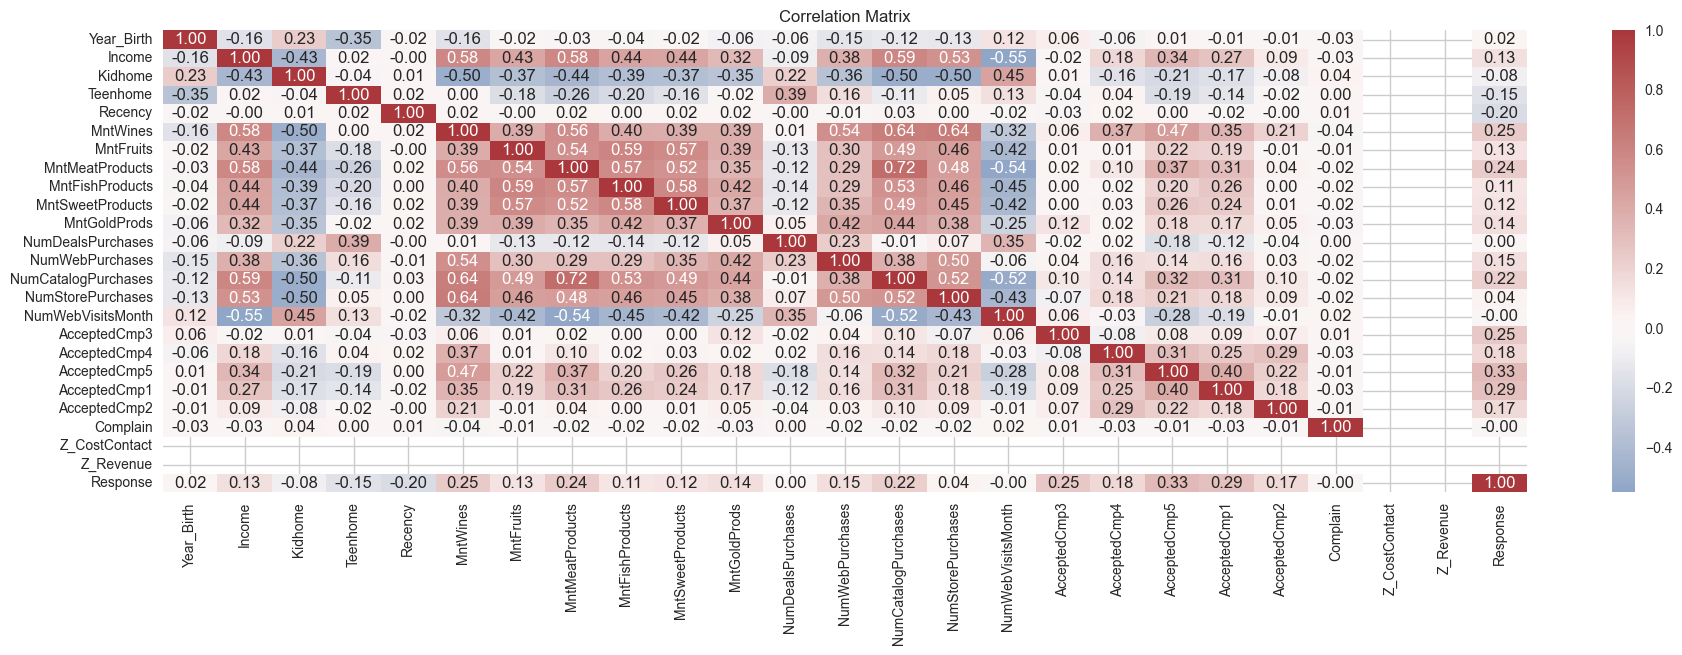

No high correlation.


In [18]:
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation = corr_matrix[((corr_matrix <= -0.8) & (corr_matrix != -1)) | ((corr_matrix >= 0.8) & (corr_matrix != 1))]
if high_correlation.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation)

### VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_features = add_constant(numerical_columns)

VIF = pd.Series([variance_inflation_factor(VIF_features.values, i) for i in range(VIF_features.shape[1])], index=VIF_features.columns)
print(VIF) # Usually VIF >= 5 suggest multicollinearity, but we dont have any.

Year_Birth             1.238978
Income                 2.189539
Kidhome                1.878994
Teenhome               1.615928
Recency                1.060235
MntWines               3.360148
MntFruits              1.948039
MntMeatProducts        2.948503
MntFishProducts        2.117322
MntSweetProducts       1.916488
MntGoldProds           1.514218
NumDealsPurchases      1.679910
NumWebPurchases        1.945103
NumCatalogPurchases    3.060246
NumStorePurchases      2.424325
NumWebVisitsMonth      2.338222
AcceptedCmp3           1.157165
AcceptedCmp4           1.371511
AcceptedCmp5           1.658952
AcceptedCmp1           1.354668
AcceptedCmp2           1.158705
Complain               1.006850
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.395201
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**As a result, we discover no multicollinearity from the numerical dataset.**

## Feature Engineering

### Adding new features(optional)

In [20]:
data_newfeature = data2.copy()

# Membership enrollment time !! SHOULD WE USE A DATE INSTEAD?
data_newfeature['Enroll_Year'] = data_newfeature['Dt_Customer'].str[-4:].astype(int)
data_newfeature['Enroll_Month'] = data_newfeature['Dt_Customer'].str[3:5].astype(int)
data_newfeature['Enroll_Day'] = data_newfeature['Dt_Customer'].str[0:2].astype(int)
data_newfeature.drop(columns=['Dt_Customer'], inplace=True)
data_newfeature['Member_Year'] = 2016 - data_newfeature['Enroll_Year']

# Since max enroll_year is 2014, we assume the company is evaluating their customer in 2016
data_newfeature['Age'] = 2016 - data_newfeature['Year_Birth']     

# Add total amount
data_newfeature['Total_amount'] = data_newfeature[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Add total purchase
data_newfeature['Total_purchase'] = data_newfeature[['NumWebPurchases', 'NumCatalogPurchases', 
                                           'NumStorePurchases']].sum(axis=1)

# Calculate features regarding the user
data_newfeature['Total_Children'] = data_newfeature['Kidhome'] + data_newfeature['Teenhome']
data_newfeature["Is_Parent"] = np.where(data_newfeature['Total_Children']> 0, 1, 0)

data_newfeature["Family_Size"] = data_newfeature["Marital_Status"].replace({"Married": 2, "Together": 2, \
                            "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1}).astype(int) \
                            + data_newfeature["Total_Children"]


data_newfeature['Cmp_Attitude'] = np.where((data_newfeature['AcceptedCmp1'] + data_newfeature['AcceptedCmp2'] +
                                            data_newfeature['AcceptedCmp3'] + data_newfeature['AcceptedCmp4'] +
                                            data_newfeature['AcceptedCmp5']) > 0, 1, 0)

# Calculate the percentiles for 'Recency', 'Frequency', and 'Monetary'
recency_50th = data_newfeature['Recency'].quantile(0.5)
frequency_50th = data_newfeature['Total_purchase'].quantile(0.5)
monetary_50th = data_newfeature['Total_amount'].quantile(0.5)

# Assign binary scores for each R,F,M category
data_newfeature['R'] = (data_newfeature['Recency'] <= recency_50th).astype(int)
data_newfeature['F'] = (data_newfeature['Total_purchase'] > frequency_50th).astype(int)
data_newfeature['M'] = (data_newfeature['Total_amount'] > monetary_50th).astype(int)

# Combine the R,F,M scores to a single group identifier
data_newfeature['RFM_Score'] = data_newfeature['R'].astype(str) + data_newfeature['F'].astype(str) +\
    data_newfeature['M'].astype(str)

# Define group names based on RFM_Score
group_names = {
    '111': 'Loyalist',
    '011': 'Potential Loyalist',
    '101': 'New Customers',
    '001': 'Promising',
    '110': 'At Risk',
    '010': 'Need Attention',
    '100': 'About To Sleep',
    '000': 'Hibernating'
}
    
# Map the group names to the dataframe
data_newfeature['RFM_Group'] = data_newfeature['RFM_Score'].map(group_names)
    
    # One-hot encoding the 'RFM_Group'
data_newfeature = pd.get_dummies(data_newfeature, columns=['RFM_Group'])

# Initialize a new column with empty strings
data_newfeature['Age_Demographic'] = ""
    
    # Iterate over each row to assign the age demographic based on age
for index, row in data_newfeature.iterrows():
    if row["Year_Birth"] <= 1964:
        data_newfeature.at[index, "Age_Demographic"] = "Baby Boomer"
    elif row["Year_Birth"] <= 1980:
        data_newfeature.at[index, "Age_Demographic"] = "Gen X"
    elif row["Year_Birth"] <= 1996:
        data_newfeature.at[index, "Age_Demographic"] = "Gen Y"
    else:
        data_newfeature.at[index, "Age_Demographic"] = "Gen Z"
data_newfeature = pd.get_dummies(data_newfeature, columns=['Age_Demographic'])

# Iterate over each row to assign the income category based on income
for index, row in data_newfeature.iterrows():
    if row["Income"] <= 2333:
        data_newfeature.at[index, "Income_Category"] = "Low"
    elif row["Income"] <= 12427:
        data_newfeature.at[index, "Income_Category"] = "Medium"
    else:
        data_newfeature.at[index, "Income_Category"] = "High"
    
data_newfeature = pd.get_dummies(data_newfeature, columns=['Income_Category'])

# Drop the columns that are not needed
data_newfeature.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_28948/906272262.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_newfeature["Family_Size"] = data_newfeature["Marital_Status"].replace({"Married": 2, "Together": 2, \


In [21]:
data_newfeature.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_amount,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude,R,F,M,RFM_Score,RFM_Group_About To Sleep,RFM_Group_At Risk,RFM_Group_Hibernating,RFM_Group_Loyalist,RFM_Group_Need Attention,RFM_Group_New Customers,RFM_Group_Potential Loyalist,RFM_Group_Promising,Age_Demographic_Baby Boomer,Age_Demographic_Gen X,Age_Demographic_Gen Y,Income_Category_High,Income_Category_Low,Income_Category_Medium
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,9,4,4,59,1617,22,0,0,1,0,0,1,1,011,False,False,False,False,False,False,True,False,True,False,False,True,False,False
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,3,8,2,62,27,4,2,1,3,0,1,0,0,100,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,21,3,51,776,20,0,0,2,0,1,1,1,111,False,False,False,True,False,False,False,False,False,True,False,True,False,False


In [22]:
data_newfeature.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_amount,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude,R,F,M
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5592.667413,1968.888988,51823.479831,0.444047,0.506714,49.136974,304.337064,26.291853,166.399731,37.561325,27.102954,44.019696,2.321397,4.091316,2.653089,5.799910,5.323187,0.072963,0.074754,0.072516,0.064458,0.013429,0.008953,0.149508,2013.028201,6.465533,15.645479,2.971799,47.111012,605.712623,12.544315,0.950761,0.715309,2.595345,0.206804,0.500000,0.494181,0.500000
std,3243.972517,11.704269,21209.412805,0.538490,0.544648,28.961593,336.669241,39.737595,223.657780,54.666125,41.311159,52.070413,1.914570,2.778538,2.875078,3.249414,2.423635,0.260134,0.263053,0.259398,0.245623,0.115128,0.094215,0.356668,0.684818,3.490236,8.784712,0.684818,11.704269,601.582708,7.197244,0.751944,0.451368,0.907300,0.405104,0.500112,0.500078,0.500112
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,2.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2832.250000,1959.000000,35395.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,3.000000,39.000000,69.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.500000,174.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,16.000000,3.000000,46.000000,396.500000,12.000000,1.000000,1.000000,3.000000,0.000000,0.500000,0.000000,0.500000
75%,8425.250000,1977.000000,68146.500000,1.000000,1.000000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,23.000000,3.000000,57.000000,1044.750000,18.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000
max,11191.000000,1996.000000,157733.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,31.000000,4.000000,76.000000,2525.000000,32.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


### One-Hot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(data_newfeature[['Education', 'Marital_Status']])

encoded_feature_names = encoder.get_feature_names_out(['Education', 'Marital_Status'])

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

data_newfeature.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

data_newfeature = pd.concat([data_newfeature.drop(columns=['Education', 'Marital_Status']), encoded_df], axis=1)


In [24]:
data_newfeature.drop(columns=['RFM_Score'], inplace=True)

# Feature Selection

## LassoCV

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

def feature_selection_lasso(df, target_column):
    # Drop columns that are not needed
    df = df.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
                          'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Enroll_Year', 'Enroll_Month',
                          'Enroll_Day', 'Member_Year', 'Total_Children', 'Is_Parent', 'Family_Size',
                          'RFM_Group_About To Sleep', 'RFM_Group_At Risk', 'RFM_Group_Hibernating',
                          'RFM_Group_Loyalist', 'RFM_Group_Need Attention', 'RFM_Group_New Customers',
                          'RFM_Group_Potential Loyalist', 'RFM_Group_Promising', 'Age_Demographic_Baby Boomer',
                          'Age_Demographic_Gen X', 'Age_Demographic_Gen Y', 'Income'])

    if target_column == 'Total_purchase':
        df = df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
                              'Total_amount'])
    elif target_column == 'Total_amount':
        df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                              'MntSweetProducts', 'MntGoldProds', 'Total_purchase'])

    # Separate the features and the target
    X = df.drop(columns=[target_column])
    y = df[target_column]
            
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
            
    # Perform feature selection using LassoCV
    lasso = LassoCV(cv=5).fit(X_scaled, y)
            
    # Get the coefficients
    coef = lasso.coef_
            
    # Select features that have non-zero coefficients
    selected_features = X.columns[coef != 0]
            
    # Create a new dataframe with selected features and normalize them
    df_selected = df[selected_features]
    df_selected = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
            
    # Add the target column back
    df_selected[target_column] = y
            
    return df_selected

### Target column: 'Response' (whether accepted the offer in the recent campaign)

In [26]:
target_column = 'Response'
data_selected = feature_selection_lasso(data_newfeature, target_column)
data_selected.sort_values(by=target_column, ascending=False)
data_selected.reset_index(drop=True, inplace=True)
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recency                  2234 non-null   float64
 1   MntFruits                2234 non-null   float64
 2   MntMeatProducts          2234 non-null   float64
 3   MntFishProducts          2234 non-null   float64
 4   MntSweetProducts         2234 non-null   float64
 5   MntGoldProds             2234 non-null   float64
 6   NumDealsPurchases        2234 non-null   float64
 7   NumWebPurchases          2234 non-null   float64
 8   NumCatalogPurchases      2234 non-null   float64
 9   NumStorePurchases        2234 non-null   float64
 10  NumWebVisitsMonth        2234 non-null   float64
 11  Complain                 2234 non-null   float64
 12  Age                      2234 non-null   float64
 13  Total_amount             2234 non-null   float64
 14  Cmp_Attitude            

In [27]:
data_selected.describe()

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_amount,Cmp_Attitude,R,F,M,Income_Category_High,Income_Category_Low,Education_Basic,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response
count,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2234.000000,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2234.000000
mean,3.816702e-17,-4.691363e-17,1.908351e-17,2.942041e-17,-2.226410e-17,4.293790e-17,6.997287e-17,8.587580e-17,-1.908351e-17,-1.196695e-16,7.633405e-17,2.226410e-17,2.711449e-16,8.269522e-17,-4.850392e-17,0.000000,-5.884083e-17,0.000000,1.129108e-16,3.180585e-18,2.544468e-17,-3.498644e-17,4.770878e-17,-6.361170e-18,1.049593e-16,5.725053e-17,6.281656e-17,0.000000,1.272234e-17,0.149508
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,0.356668
min,-1.697005e+00,-6.617849e-01,-7.441592e-01,-6.872581e-01,-6.562155e-01,-8.455772e-01,-1.212761e+00,-1.472800e+00,-9.229950e-01,-1.785309e+00,-2.196857e+00,-9.504432e-02,-2.316854e+00,-9.987772e-01,-5.106098e-01,-1.000000,-9.884286e-01,-1.000000,-7.813805e+00,-2.116195e-02,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-7.933899e-01,-5.224313e-01,-5.901014e-01,-0.188938,-2.993422e-02,0.000000
25%,-8.681360e-01,-6.366142e-01,-6.726053e-01,-6.323672e-01,-6.320035e-01,-6.726956e-01,-6.903338e-01,-7.528363e-01,-9.229950e-01,-8.618592e-01,-9.587694e-01,-9.504432e-02,-6.931512e-01,-8.923674e-01,-5.106098e-01,-1.000000,-9.884286e-01,-1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-7.933899e-01,-5.224313e-01,-5.901014e-01,-0.188938,-2.993422e-02,0.000000
50%,1.253754e-02,-4.604191e-01,-4.445273e-01,-4.676945e-01,-4.625199e-01,-3.845596e-01,-1.679064e-01,-3.287213e-02,-2.272059e-01,-2.462258e-01,2.793178e-01,-9.504432e-02,-9.494488e-02,-3.478482e-01,-5.106098e-01,0.000000,-9.884286e-01,0.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-7.933899e-01,-5.224313e-01,-5.901014e-01,-0.188938,-2.993422e-02,0.000000
75%,8.586749e-01,1.688489e-01,2.922541e-01,2.275899e-01,1.427790e-01,2.301304e-01,3.545210e-01,6.870920e-01,4.685831e-01,6.772243e-01,6.920135e-01,-9.504432e-02,8.450936e-01,7.299672e-01,-5.106098e-01,1.000000,1.011707e+00,1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,1.260414e+00,-5.224313e-01,1.694624e+00,-0.188938,-2.993422e-02,0.000000
max,1.722080e+00,4.347188e+00,6.970244e+00,4.051655e+00,5.711528e+00,6.108104e+00,6.623650e+00,8.246715e+00,8.818051e+00,2.216308e+00,6.057058e+00,1.052141e+01,2.468796e+00,3.191111e+00,1.958443e+00,1.000000,1.011707e+00,1.000000,1.279786e-01,4.725463e+01,6.353768e+00,2.244513e+00,1.904011e+00,2.727025e+01,1.260414e+00,1.914127e+00,1.694624e+00,5.292730,3.340659e+01,1.000000


### Target column: 'Total_purchase' (total number of purchase)

In [28]:
target_column = 'Total_purchase'
data_selected2 = feature_selection_lasso(data_newfeature, target_column)
data_selected2.sort_values(by=target_column, ascending=False)
data_selected2.reset_index(drop=True, inplace=True)
data_selected2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MntWines               2234 non-null   float64
 1   MntFruits              2234 non-null   float64
 2   MntMeatProducts        2234 non-null   float64
 3   MntFishProducts        2234 non-null   float64
 4   MntSweetProducts       2234 non-null   float64
 5   MntGoldProds           2234 non-null   float64
 6   Response               2234 non-null   float64
 7   Age                    2234 non-null   float64
 8   Cmp_Attitude           2234 non-null   float64
 9   R                      2234 non-null   float64
 10  F                      2234 non-null   float64
 11  M                      2234 non-null   float64
 12  Income_Category_High   2234 non-null   float64
 13  Income_Category_Low    2234 non-null   float64
 14  Education_Basic        2234 non-null   float64
 15  Mari

In [29]:
data_selected2.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response,Age,Cmp_Attitude,R,F,M,Income_Category_High,Income_Category_Low,Education_Basic,Marital_Status_Single,Marital_Status_YOLO,Total_purchase
count,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2234.000000,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000
mean,9.223697e-17,-4.691363e-17,1.908351e-17,2.942041e-17,-2.226410e-17,4.293790e-17,4.293790e-17,2.711449e-16,-4.850392e-17,0.000000,-5.884083e-17,0.000000,1.129108e-16,3.180585e-18,2.544468e-17,5.725053e-17,1.272234e-17,12.544315
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,7.197244
min,-9.041670e-01,-6.617849e-01,-7.441592e-01,-6.872581e-01,-6.562155e-01,-8.455772e-01,-4.192726e-01,-2.316854e+00,-5.106098e-01,-1.000000,-9.884286e-01,-1.000000,-7.813805e+00,-2.116195e-02,-1.573869e-01,-5.224313e-01,-2.993422e-02,0.000000
25%,-8.328644e-01,-6.366142e-01,-6.726053e-01,-6.323672e-01,-6.320035e-01,-6.726956e-01,-4.192726e-01,-6.931512e-01,-5.106098e-01,-1.000000,-9.884286e-01,-1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-5.224313e-01,-2.993422e-02,6.000000
50%,-3.857380e-01,-4.604191e-01,-4.445273e-01,-4.676945e-01,-4.625199e-01,-3.845596e-01,-4.192726e-01,-9.494488e-02,-5.106098e-01,0.000000,-9.884286e-01,0.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-5.224313e-01,-2.993422e-02,12.000000
75%,5.954147e-01,1.688489e-01,2.922541e-01,2.275899e-01,1.427790e-01,2.301304e-01,-4.192726e-01,8.450936e-01,-5.106098e-01,1.000000,1.011707e+00,1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-5.224313e-01,-2.993422e-02,18.000000
max,3.531445e+00,4.347188e+00,6.970244e+00,4.051655e+00,5.711528e+00,6.108104e+00,2.385083e+00,2.468796e+00,1.958443e+00,1.000000,1.011707e+00,1.000000,1.279786e-01,4.725463e+01,6.353768e+00,1.914127e+00,3.340659e+01,32.000000


### Target column: 'Total_amount' (total amount spent)

In [30]:
target_column = 'Total_amount'
data_selected3 = feature_selection_lasso(data_newfeature, target_column)
data_selected3.sort_values(by=target_column, ascending=False)
data_selected3.reset_index(drop=True, inplace=True)
data_selected3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recency                  2234 non-null   float64
 1   NumDealsPurchases        2234 non-null   float64
 2   NumWebPurchases          2234 non-null   float64
 3   NumCatalogPurchases      2234 non-null   float64
 4   NumStorePurchases        2234 non-null   float64
 5   NumWebVisitsMonth        2234 non-null   float64
 6   Complain                 2234 non-null   float64
 7   Response                 2234 non-null   float64
 8   Age                      2234 non-null   float64
 9   Cmp_Attitude             2234 non-null   float64
 10  M                        2234 non-null   float64
 11  Income_Category_High     2234 non-null   float64
 12  Income_Category_Low      2234 non-null   float64
 13  Education_Basic          2234 non-null   float64
 14  Education_Graduation    

In [31]:
data_selected3.describe()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Cmp_Attitude,M,Income_Category_High,Income_Category_Low,Education_Basic,Education_Graduation,Education_Master,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Together,Marital_Status_YOLO,Total_amount
count,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000
mean,3.816702e-17,6.997287e-17,8.587580e-17,-1.908351e-17,-1.196695e-16,7.633405e-17,2.226410e-17,4.293790e-17,2.711449e-16,-4.850392e-17,0.000000,1.129108e-16,3.180585e-18,2.544468e-17,-9.541756e-18,-3.498644e-17,-6.361170e-18,1.049593e-16,6.281656e-17,1.272234e-17,605.712623
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,601.582708
min,-1.697005e+00,-1.212761e+00,-1.472800e+00,-9.229950e-01,-1.785309e+00,-2.196857e+00,-9.504432e-02,-4.192726e-01,-2.316854e+00,-5.106098e-01,-1.000000,-7.813805e+00,-2.116195e-02,-1.573869e-01,-1.008090e+00,-4.455310e-01,-3.666999e-02,-7.933899e-01,-5.901014e-01,-2.993422e-02,5.000000
25%,-8.681360e-01,-6.903338e-01,-7.528363e-01,-9.229950e-01,-8.618592e-01,-9.587694e-01,-9.504432e-02,-4.192726e-01,-6.931512e-01,-5.106098e-01,-1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,-1.008090e+00,-4.455310e-01,-3.666999e-02,-7.933899e-01,-5.901014e-01,-2.993422e-02,69.000000
50%,1.253754e-02,-1.679064e-01,-3.287213e-02,-2.272059e-01,-2.462258e-01,2.793178e-01,-9.504432e-02,-4.192726e-01,-9.494488e-02,-5.106098e-01,0.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,9.919749e-01,-4.455310e-01,-3.666999e-02,-7.933899e-01,-5.901014e-01,-2.993422e-02,396.500000
75%,8.586749e-01,3.545210e-01,6.870920e-01,4.685831e-01,6.772243e-01,6.920135e-01,-9.504432e-02,-4.192726e-01,8.450936e-01,-5.106098e-01,1.000000,1.279786e-01,-2.116195e-02,-1.573869e-01,9.919749e-01,-4.455310e-01,-3.666999e-02,1.260414e+00,1.694624e+00,-2.993422e-02,1044.750000
max,1.722080e+00,6.623650e+00,8.246715e+00,8.818051e+00,2.216308e+00,6.057058e+00,1.052141e+01,2.385083e+00,2.468796e+00,1.958443e+00,1.000000,1.279786e-01,4.725463e+01,6.353768e+00,9.919749e-01,2.244513e+00,2.727025e+01,1.260414e+00,1.694624e+00,3.340659e+01,2525.000000


### Target column: 'Cmp_Attitude' (whether accepted any deal from campaigns)

In [32]:
target_column = 'Cmp_Attitude'
data_selected4 = feature_selection_lasso(data_newfeature, target_column)
data_selected4.sort_values(by=target_column, ascending=False)
data_selected4.reset_index(drop=True, inplace=True)
data_selected4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recency                  2234 non-null   float64
 1   MntWines                 2234 non-null   float64
 2   MntFruits                2234 non-null   float64
 3   MntGoldProds             2234 non-null   float64
 4   NumDealsPurchases        2234 non-null   float64
 5   NumCatalogPurchases      2234 non-null   float64
 6   NumStorePurchases        2234 non-null   float64
 7   Complain                 2234 non-null   float64
 8   Response                 2234 non-null   float64
 9   Age                      2234 non-null   float64
 10  Education_Basic          2234 non-null   float64
 11  Education_Master         2234 non-null   float64
 12  Education_PhD            2234 non-null   float64
 13  Marital_Status_Alone     2234 non-null   float64
 14  Marital_Status_Divorced 

In [33]:
data_selected4.describe()

,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_YOLO,Cmp_Attitude
count,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000
mean,3.816702e-17,9.223697e-17,-4.691363e-17,4.293790e-17,6.997287e-17,-1.908351e-17,-1.196695e-16,2.226410e-17,4.293790e-17,2.711449e-16,2.544468e-17,-3.498644e-17,4.770878e-17,-6.361170e-18,-3.021556e-17,1.049593e-16,5.725053e-17,1.272234e-17,0.206804
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,0.405104
min,-1.697005e+00,-9.041670e-01,-6.617849e-01,-8.455772e-01,-1.212761e+00,-9.229950e-01,-1.785309e+00,-9.504432e-02,-4.192726e-01,-2.316854e+00,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-3.395983e-01,-7.933899e-01,-5.224313e-01,-2.993422e-02,0.000000
25%,-8.681360e-01,-8.328644e-01,-6.366142e-01,-6.726956e-01,-6.903338e-01,-9.229950e-01,-8.618592e-01,-9.504432e-02,-4.192726e-01,-6.931512e-01,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-3.395983e-01,-7.933899e-01,-5.224313e-01,-2.993422e-02,0.000000
50%,1.253754e-02,-3.857380e-01,-4.604191e-01,-3.845596e-01,-1.679064e-01,-2.272059e-01,-2.462258e-01,-9.504432e-02,-4.192726e-01,-9.494488e-02,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-3.395983e-01,-7.933899e-01,-5.224313e-01,-2.993422e-02,0.000000
75%,8.586749e-01,5.954147e-01,1.688489e-01,2.301304e-01,3.545210e-01,4.685831e-01,6.772243e-01,-9.504432e-02,-4.192726e-01,8.450936e-01,-1.573869e-01,-4.455310e-01,-5.252070e-01,-3.666999e-02,-3.395983e-01,1.260414e+00,-5.224313e-01,-2.993422e-02,0.000000
max,1.722080e+00,3.531445e+00,4.347188e+00,6.108104e+00,6.623650e+00,8.818051e+00,2.216308e+00,1.052141e+01,2.385083e+00,2.468796e+00,6.353768e+00,2.244513e+00,1.904011e+00,2.727025e+01,2.944655e+00,1.260414e+00,1.914127e+00,3.340659e+01,1.000000


### Target column: 'Recency' (Number of days since customer's last purchase)

In [34]:
target_column = 'Recency'
data_selected5 = feature_selection_lasso(data_newfeature, target_column)
data_selected5.sort_values(by=target_column, ascending=False)
data_selected5.reset_index(drop=True, inplace=True)
data_selected5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MntMeatProducts       2234 non-null   float64
 1   MntGoldProds          2234 non-null   float64
 2   NumWebVisitsMonth     2234 non-null   float64
 3   Complain              2234 non-null   float64
 4   Response              2234 non-null   float64
 5   Age                   2234 non-null   float64
 6   Cmp_Attitude          2234 non-null   float64
 7   R                     2234 non-null   float64
 8   F                     2234 non-null   float64
 9   Income_Category_High  2234 non-null   float64
 10  Education_Graduation  2234 non-null   float64
 11  Education_Master      2234 non-null   float64
 12  Marital_Status_Alone  2234 non-null   float64
 13  Marital_Status_Widow  2234 non-null   float64
 14  Marital_Status_YOLO   2234 non-null   float64
 15  Recency              

In [35]:
data_selected5.describe()

,MntMeatProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,Age,Cmp_Attitude,R,F,Income_Category_High,Education_Graduation,Education_Master,Marital_Status_Alone,Marital_Status_Widow,Marital_Status_YOLO,Recency
count,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2.234000e+03,2234.000000,2.234000e+03,2234.000000
mean,1.908351e-17,4.293790e-17,7.633405e-17,2.226410e-17,4.293790e-17,2.711449e-16,-4.850392e-17,0.000000,-5.884083e-17,1.129108e-16,-9.541756e-18,-3.498644e-17,-6.361170e-18,0.000000,1.272234e-17,49.136974
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,28.961593
min,-7.441592e-01,-8.455772e-01,-2.196857e+00,-9.504432e-02,-4.192726e-01,-2.316854e+00,-5.106098e-01,-1.000000,-9.884286e-01,-7.813805e+00,-1.008090e+00,-4.455310e-01,-3.666999e-02,-0.188938,-2.993422e-02,0.000000
25%,-6.726053e-01,-6.726956e-01,-9.587694e-01,-9.504432e-02,-4.192726e-01,-6.931512e-01,-5.106098e-01,-1.000000,-9.884286e-01,1.279786e-01,-1.008090e+00,-4.455310e-01,-3.666999e-02,-0.188938,-2.993422e-02,24.000000
50%,-4.445273e-01,-3.845596e-01,2.793178e-01,-9.504432e-02,-4.192726e-01,-9.494488e-02,-5.106098e-01,0.000000,-9.884286e-01,1.279786e-01,9.919749e-01,-4.455310e-01,-3.666999e-02,-0.188938,-2.993422e-02,49.500000
75%,2.922541e-01,2.301304e-01,6.920135e-01,-9.504432e-02,-4.192726e-01,8.450936e-01,-5.106098e-01,1.000000,1.011707e+00,1.279786e-01,9.919749e-01,-4.455310e-01,-3.666999e-02,-0.188938,-2.993422e-02,74.000000
max,6.970244e+00,6.108104e+00,6.057058e+00,1.052141e+01,2.385083e+00,2.468796e+00,1.958443e+00,1.000000,1.011707e+00,1.279786e-01,9.919749e-01,2.244513e+00,2.727025e+01,5.292730,3.340659e+01,99.000000


# PCA If Necessary

In [ ]:
# PCA if necessary
from sklearn.decomposition import PCA
def dimension_reduction(df, n_components):
    # Separate the features from the target if it exists
    if target_column in df.columns:
        X = df.drop(columns=[target_column])
        y = df[target_column]
    else:
        X = df
        y = None
                
    # Perform PCA for dimension reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
                
    # Create a new dataframe with the reduced dimensions
    columns = [f'PC{i+1}' for i in range(n_components)]
    df_reduced = pd.DataFrame(X_pca, columns=columns)
                
    # Add the target column back if it exists
    if y is not None:
        df_reduced[target_column] = y
                
    return df_reduced
df_reduced = dimension_reduction(data_selected, 2)

# Export Preprocessed data

In [36]:
data_newfeature.to_csv('Final Preprocessed Data.csv', index=False)